#CA2 = title, description ...

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Let’s begin by downloading the data for, and listing the files within the dataset.

In [3]:
hotel_df = pd.read_csv("hotel_bookings.csv")

We have downlaoded all the libraries, panda for data manipluation and analysis library, matplotlib.pyplot and seaborn for data visualisation, numpy for numerical computing, sklearn libraries for future scaling for ML models, PCA, encoding, training and testing sets, linear regression model for predictive modeling. 
Libraries are now imported and have been assigned the abbreviated formats. The abbreviated format makes recalling and using these libraries more efficient. Lastly, we have uploaded a csv file that we renamed as a hotel.df for easy reference. 


## Data Preparation ##

In [4]:
!pip install datacleaner

Defaulting to user installation because normal site-packages is not writeable


In [5]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_df.shape

(119390, 32)

At this point we can start reviewing the data. At the first glance, we can see that this is a dataset with 14 variables (columns) and 119390 observations (rows) 


In [7]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [9]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
#hotel_df.describe(include=object)

In [11]:
hotel_df.describe(include=object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


EDA

In [12]:
hotel_df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


<AxesSubplot:>

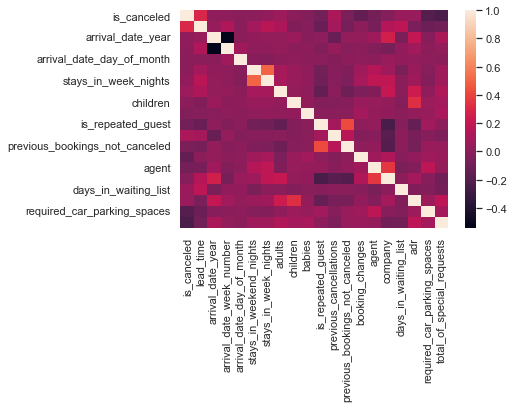

In [13]:
sns.heatmap(hotel_df.corr())

In [14]:
hotel_df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
hotel_df = hotel_df.fillna(0)

In [16]:
hotel_df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [17]:
hotel_df.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [18]:
hotel_df.country.nunique()

178

In [19]:
top_countries_with_codes = hotel_df.country.value_counts().head(10)
top_countries_with_codes

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

In [20]:
hotel_df = hotel_df.fillna(0)

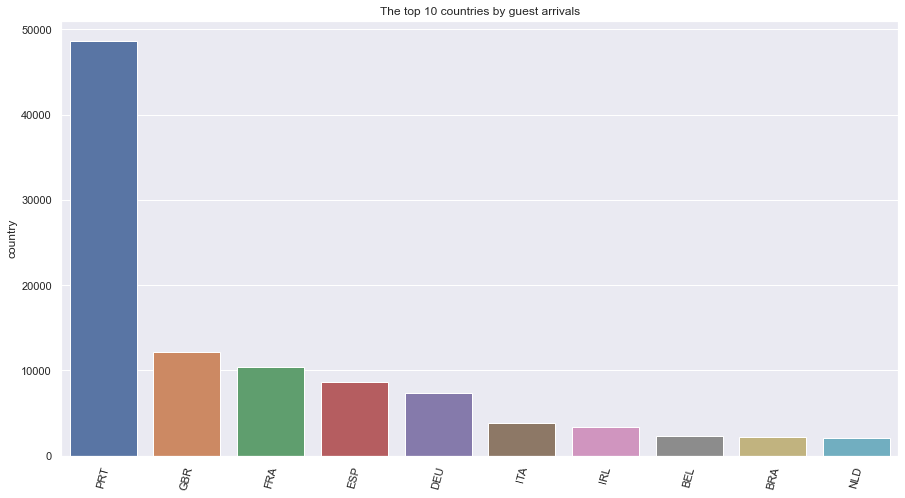

In [21]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)
plt.title('The top 10 countries by guest arrivals')
sns.barplot(x=top_countries_with_codes.index, y=top_countries_with_codes);

In [22]:
hotel_df.fillna(0, inplace = True)

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

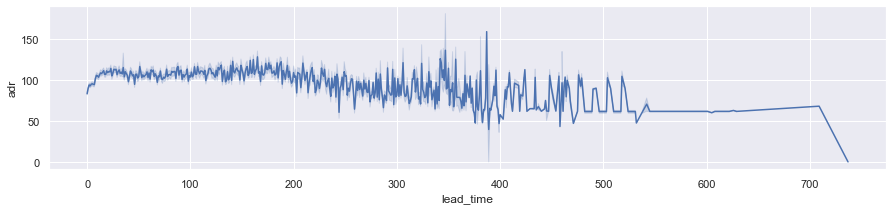

In [23]:
plt.figure(figsize=(15,3))
sns.lineplot(data=hotel_df,x='lead_time',y='adr')

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

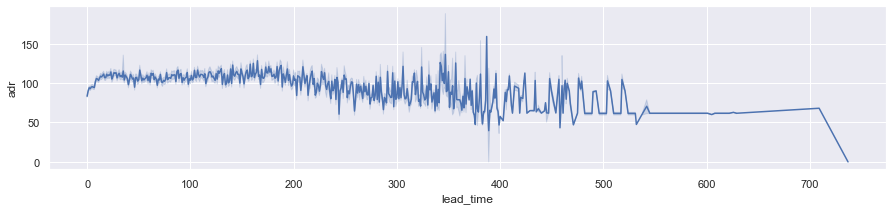

In [24]:
plt.figure(figsize=(15,3))
sns.lineplot(data=hotel_df,x='lead_time',y='adr')

In [35]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [36]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (hotel_df.children == 0) & (hotel_df.adults == 0) & (hotel_df.babies == 0)
hotel_df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,1,0,1,2015,9,41,6,0,3,0,0,0,SC,PRT,4,Corporate,0,0,0,A,I,1,No Deposit,0.0,174.0,0,Transient-Party,0,0,0,Check-Out,2015-10-06
2409,1,0,0,2015,9,42,12,0,0,0,0,0,SC,PRT,4,Corporate,0,0,0,A,I,0,No Deposit,0.0,174.0,0,Transient,0,0,0,Check-Out,2015-10-12
3181,1,0,36,2015,10,47,20,1,2,0,0,0,SC,ESP,2,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0.0,0,Transient-Party,0,0,0,Check-Out,2015-11-23
3684,1,0,165,2015,11,53,30,1,4,0,0,0,SC,PRT,2,TA/TO,0,0,0,A,A,1,No Deposit,308.0,0.0,122,Transient-Party,0,0,0,Check-Out,2016-01-04
3708,1,0,165,2015,11,53,30,2,4,0,0,0,SC,PRT,2,TA/TO,0,0,0,A,C,1,No Deposit,308.0,0.0,122,Transient-Party,0,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,0,0,107,2017,5,26,27,0,3,0,0,0,BB,CHE,0,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0.0,0,Transient,100,0,0,Check-Out,2017-06-30
115091,0,0,1,2017,5,26,30,0,1,0,0,0,SC,PRT,5,Direct,0,0,0,E,K,0,No Deposit,0.0,0.0,0,Transient,0,1,1,Check-Out,2017-07-01
116251,0,0,44,2017,6,28,15,1,1,0,0,0,SC,SWE,0,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0.0,0,Transient,73,0,0,Check-Out,2017-07-17
116534,0,0,2,2017,6,28,15,2,5,0,0,0,SC,RUS,0,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0.0,0,Transient-Party,22,0,1,Check-Out,2017-07-22


<AxesSubplot:xlabel='lead_time', ylabel='adr'>

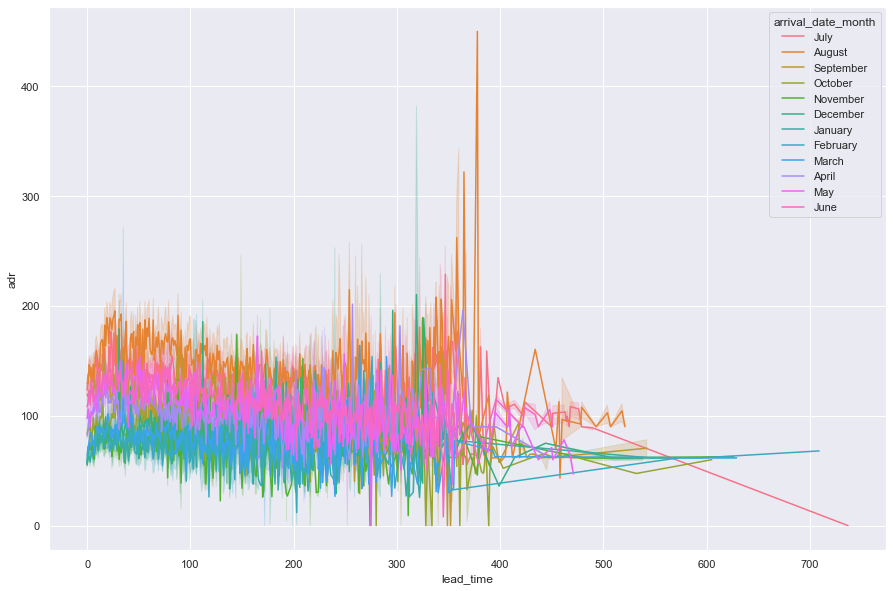

In [25]:
plt.figure(figsize=(15,10))
sns.lineplot(data=hotel_df,x='lead_time',y='adr', hue='arrival_date_month')

In [37]:
hotel_df = hotel_df[~filter]
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,6,27,1,0,0,2,0,0,BB,PRT,3,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,6,27,1,0,0,2,0,0,BB,PRT,3,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,6,27,1,0,1,1,0,0,BB,GBR,3,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,1,0,13,2015,6,27,1,0,1,1,0,0,BB,GBR,4,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,1,0,14,2015,6,27,1,0,2,2,0,0,BB,GBR,0,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,7,35,30,2,5,2,0,0,BB,BEL,1,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96,0,0,Check-Out,2017-09-06
119386,0,0,102,2017,7,35,31,2,5,3,0,0,BB,FRA,0,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225,0,2,Check-Out,2017-09-07
119387,0,0,34,2017,7,35,31,2,5,2,0,0,BB,DEU,0,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157,0,4,Check-Out,2017-09-07
119388,0,0,109,2017,7,35,31,2,5,2,0,0,BB,GBR,0,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104,0,0,Check-Out,2017-09-07


if hotel has cancellatios the filter will show us the hotels not cancel =  0 not cancelled 1 cancelled

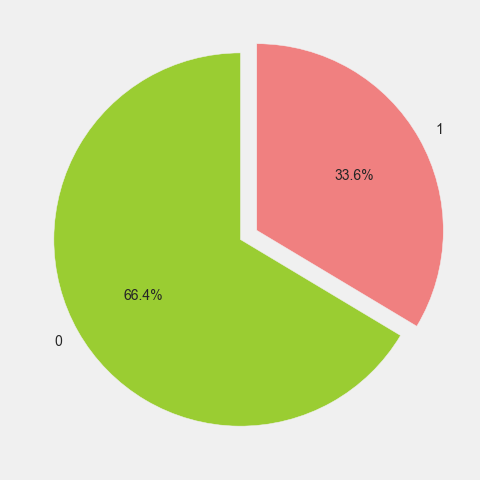

In [38]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = hotel_df['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = hotel_df['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['yellowgreen', 'lightcoral']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

<AxesSubplot:xlabel='lead_time', ylabel='adr'>

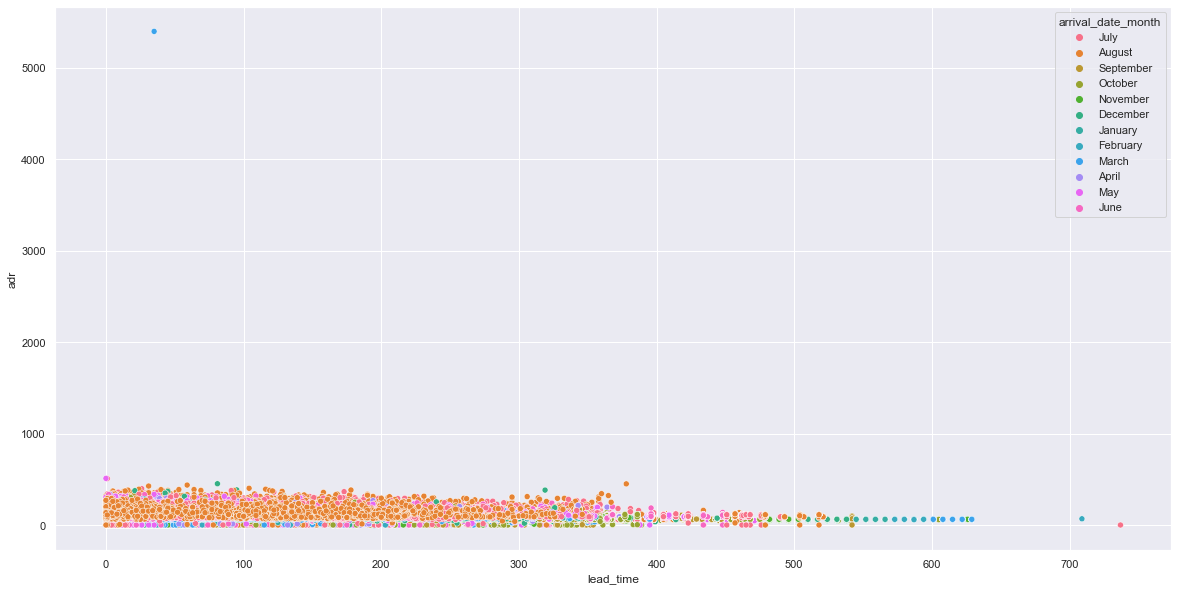

In [26]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=hotel_df,x='lead_time',y='adr', hue='arrival_date_month')

converting string to integrer/ number 

In [27]:
## Exploratory Data Analysis ##

In [28]:
adr=hotel_df['adr']

In [29]:
hotel_df = hotel_df.astype({"hotel":'string'})
hotel_df["hotel"] = hotel_df["hotel"].replace(["City Hotel", "Resort Hotel"],["0", "1"])
hotel_df = hotel_df.astype({"market_segment":'string'})
hotel_df["market_segment"] = hotel_df["market_segment"].replace(["Online TA", "Offline TA/TO", "Groups", "Direct", "Corporate", "Complementary", "Aviation"],["0", "1", "2","3", "4","5", "6"])
hotel_df = hotel_df.astype({"arrival_date_month":'string'})
hotel_df["arrival_date_month"] = hotel_df["arrival_date_month"].replace(["January","February","March","April","May","June","July","August","September","October","November","December"
],["0", "1", "2","3", "4","5", "6","7","8","9","10","11"])
hotel_df = hotel_df.astype({"children":'int'})
hotel_df["children"] = hotel_df["children"].replace(["0.0", "1.0","2.0", "3.0","10.0"],["0", "1","2","3","10"])
hotel_df=hotel_df.astype({"meal":'string'})
hotel_df=hotel_df.astype({"country":'string'})
hotel_df['adr']=adr.astype({"adr":'int'})

In [30]:
hotel_df['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: string

In [31]:
#converted ADR from float to integrer^^^

In [32]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,6,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,6,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,6,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
3,1,0,13,2015,6,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02
4,1,0,14,2015,6,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98,0,1,Check-Out,2015-07-03


DataFrame Head:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,6,27,1,0,0,2,0,0,BB,PRT,3,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
1,1,0,737,2015,6,27,1,0,0,2,0,0,BB,PRT,3,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0,0,0,Check-Out,2015-07-01
2,1,0,7,2015,6,27,1,0,1,1,0,0,BB,GBR,3,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75,0,0,Check-Out,2015-07-02


DataFrame Tail:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119387,0,0,34,2017,7,35,31,2,5,2,0,0,BB,DEU,0,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157,0,4,Check-Out,2017-09-07
119388,0,0,109,2017,7,35,31,2,5,2,0,0,BB,GBR,0,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104,0,0,Check-Out,2017-09-07
119389,0,0,205,2017,7,35,29,2,7,2,0,0,HB,DEU,0,TA/TO,0,0,0,A,A,0,No Deposit,9.0,0.0,0,Transient,151,0,2,Check-Out,2017-09-07


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(119390, 32)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  string 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  string 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_w

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
is_canceled,119390,0.37,0,0.483,0,0,0,1,1,0.536672,-1.711984
lead_time,119390,104.011,69,106.863,0,18,69,160,737,1.346533,1.696328
arrival_date_year,119390,2016.157,2016,0.707,2015,2016,2016,2017,2017,-0.232580,-0.994572
arrival_date_week_number,119390,27.165,28,13.605,1,16,28,38,53,-0.010014,-0.986086
arrival_date_day_of_month,119390,15.798,16,8.781,1,8,16,23,31,-0.002000,-1.187169
stays_in_weekend_nights,119390,0.928,1,0.999,0,0,1,2,19,1.380029,7.173715
stays_in_week_nights,119390,2.5,2,1.908,0,1,2,3,50,2.862213,24.283488
adults,119390,1.856,2,0.579,0,2,2,2,55,18.317575,1352.058441
children,119390,0.104,0,0.399,0,0,0,0,10,4.112618,18.673631
babies,119390,0.008,0,0.097,0,0,0,0,10,24.646235,1633.879756


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



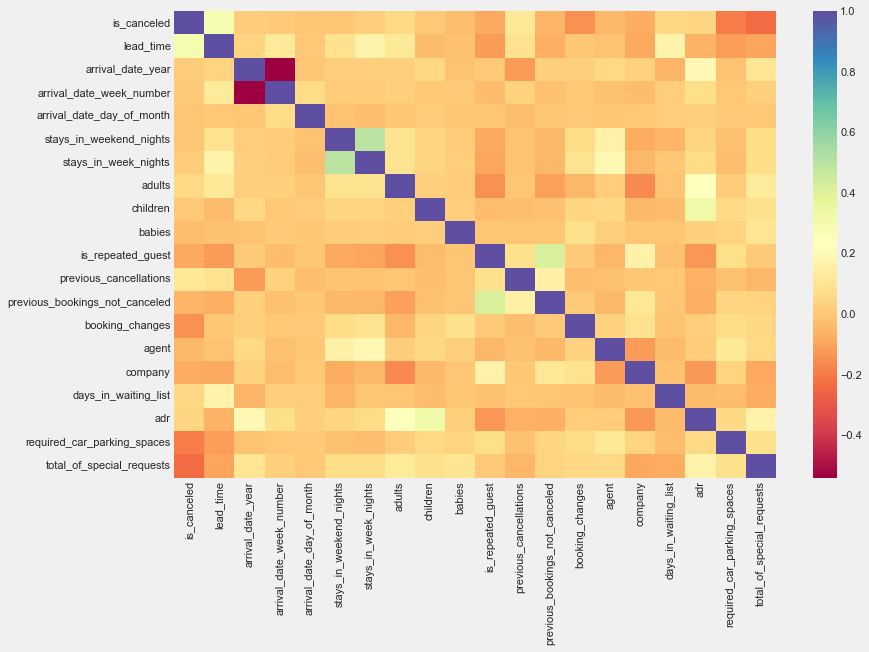

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



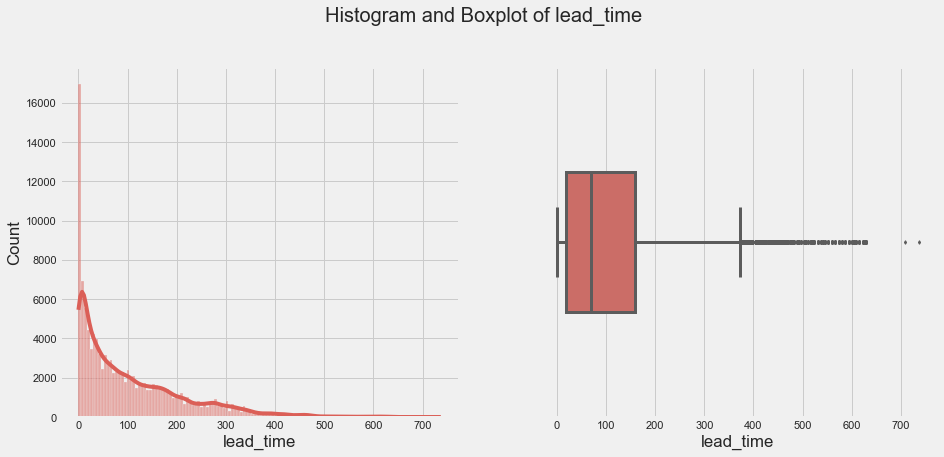

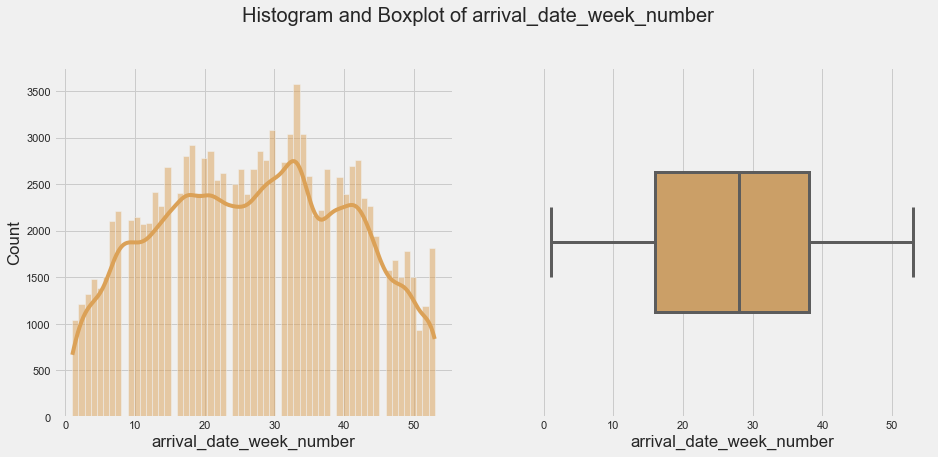

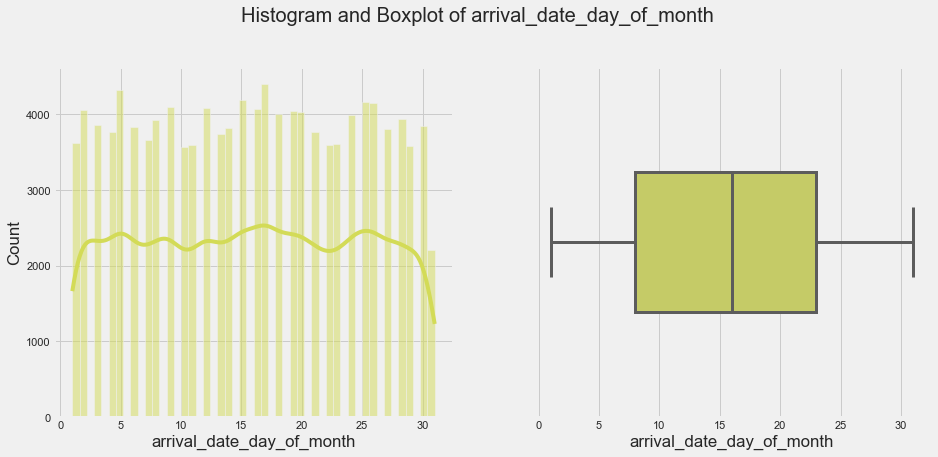

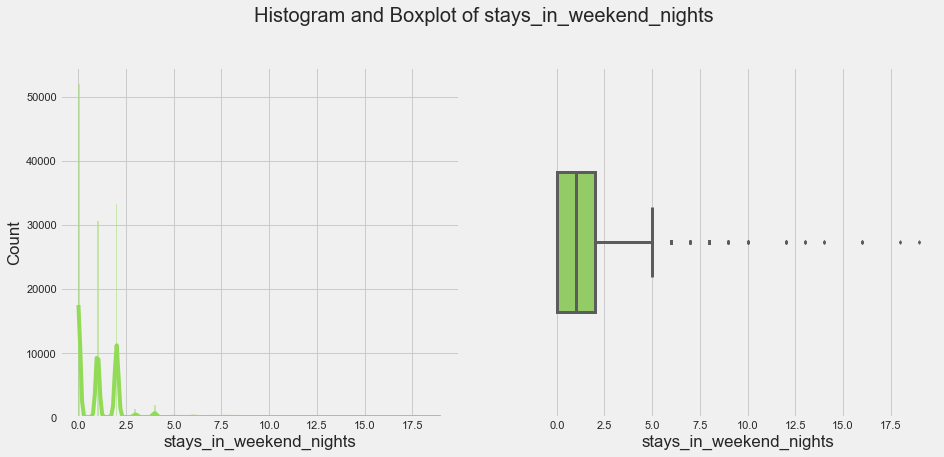

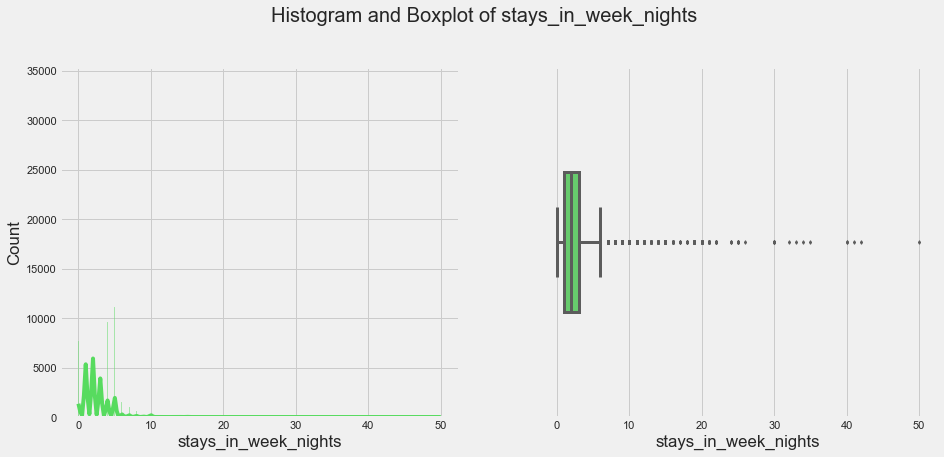

TypeError: Horizontal orientation requires numeric `x` variable.

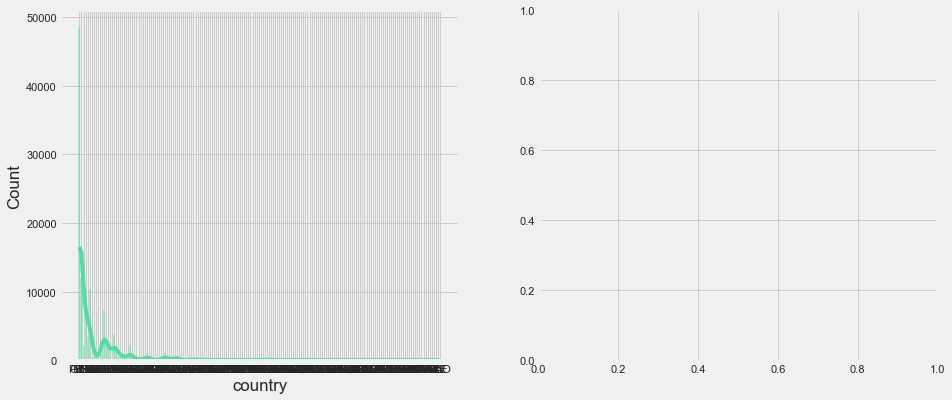

In [34]:
from fasteda import fast_eda
fast_eda(hotel_df)

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
report=sv.analyze(hotel_df)
report.show_html("output.html")

In [ ]:
children=hotel_df.groupby('children').sum()
children

In [ ]:
hotel_df.info()

In [ ]:
x = hotel_df.drop(['adr','country', 'meal'], axis = 1)

we dropping ADR for the purpose of checking dependent variable or not

In [ ]:
y =np.floor(adr)

^^^ dependedt variable, on sales etc. ADR is increasing if sales are performig good etc

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x,y,test_size = 0.2)

^^^ importing the library for ML Linear regression. continuos values

In [ ]:
lr = LinearRegression()

In [ ]:
y

In [ ]:
y.info()

In [ ]:
lr.fit(x_train, y_train)